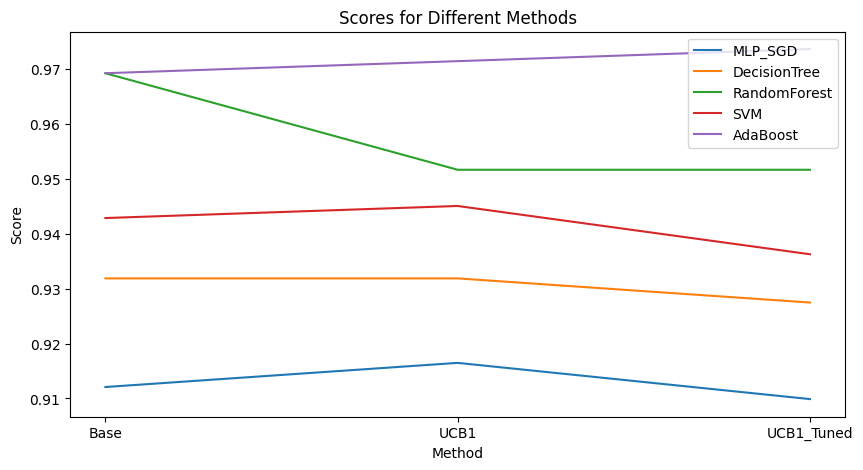

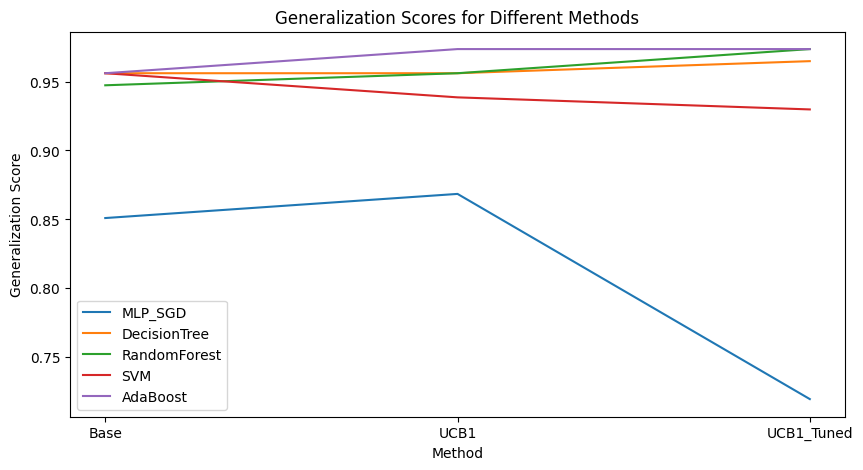

,Algorithm,Base_Score,Base_Generalization_Score,UCB1_Score,UCB1_Generalization_Score,UCB1_Tuned_Score,UCB1_Tuned_Generalization_Score,Best_Score_Method,Best_Generalization_Method
0,MLP_SGD,0.912088,0.850877,0.916484,0.868421,0.909890,0.719298,0_ucb1.csv,0_ucb1.csv
1,DecisionTree,0.931868,0.956140,0.931868,0.956140,0.927473,0.964912,"0_base.csv, 0_ucb1.csv",0_ucb1_tuned.csv
2,RandomForest,0.969231,0.947368,0.951648,0.956140,0.951648,0.973684,0_base.csv,0_ucb1_tuned.csv
3,SVM,0.942857,0.956140,0.945055,0.938596,0.936264,0.929825,0_ucb1.csv,0_base.csv
4,AdaBoost,0.969231,0.956140,0.971429,0.973684,0.973626,0.973684,0_ucb1_tuned.csv,"0_ucb1.csv, 0_ucb1_tuned.csv"


In [12]:
import os
import pandas as pd

import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {
    "Algorithm": [],
    "Base_Score": [],
    "Base_Generalization_Score": [],
    "UCB1_Score": [],
    "UCB1_Generalization_Score": [],
    "UCB1_Tuned_Score": [],
    "UCB1_Tuned_Generalization_Score": [],
    "Best_Score_Method": [],
    "Best_Generalization_Method": []
}

base_path = "breast"

# Iterate through each algorithm folder
for algo in os.listdir(base_path):
    algo_path = os.path.join(base_path, algo)
    if os.path.isdir(algo_path):
        scores = {}
        generalization_scores = {}
        
        # Read the three CSV files
        for method in ["0_base.csv", "0_ucb1.csv", "0_ucb1_tuned.csv"]:
            file_path = os.path.join(algo_path, method)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                max_row = df.loc[df['score'].idxmax()]
                scores[method] = max_row['score']
                generalization_scores[method] = max_row['generalization_score']
        
        # Store the results
        results["Algorithm"].append(algo)
        results["Base_Score"].append(scores.get("0_base.csv", None))
        results["Base_Generalization_Score"].append(generalization_scores.get("0_base.csv", None))
        results["UCB1_Score"].append(scores.get("0_ucb1.csv", None))
        results["UCB1_Generalization_Score"].append(generalization_scores.get("0_ucb1.csv", None))
        results["UCB1_Tuned_Score"].append(scores.get("0_ucb1_tuned.csv", None))
        results["UCB1_Tuned_Generalization_Score"].append(generalization_scores.get("0_ucb1_tuned.csv", None))
        
        # Determine the best methods
        max_score = max(scores.values())
        best_score_methods = [method for method, score in scores.items() if score == max_score]
        max_generalization_score = max(generalization_scores.values())
        best_generalization_methods = [method for method, gen_score in generalization_scores.items() if gen_score == max_generalization_score]
        
        results["Best_Score_Method"].append(", ".join(best_score_methods))
        results["Best_Generalization_Method"].append(", ".join(best_generalization_methods))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Score"], results_df.loc[i, "UCB1_Score"], results_df.loc[i, "UCB1_Tuned_Score"]],
             label=algo)
plt.title("Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Score")
plt.legend()
plt.show()

# Plot the generalization scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Generalization_Score"], results_df.loc[i, "UCB1_Generalization_Score"], results_df.loc[i, "UCB1_Tuned_Generalization_Score"]],
             label=algo)
plt.title("Generalization Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Generalization Score")
plt.legend()
plt.show()

results_df.head(10)

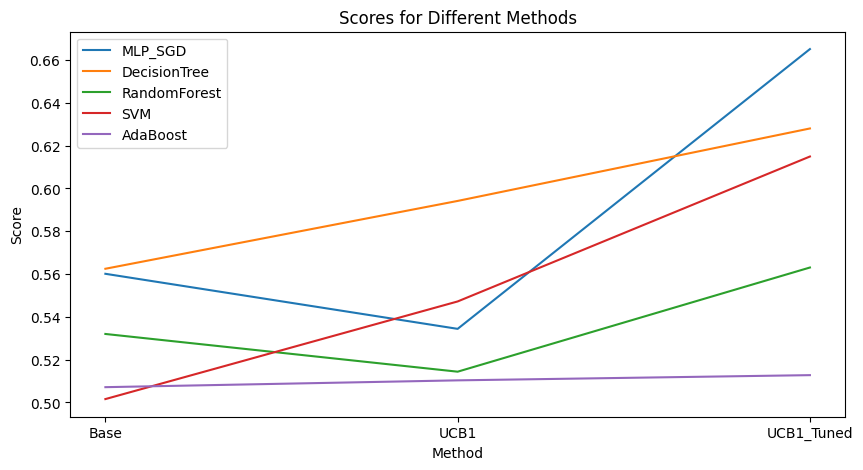

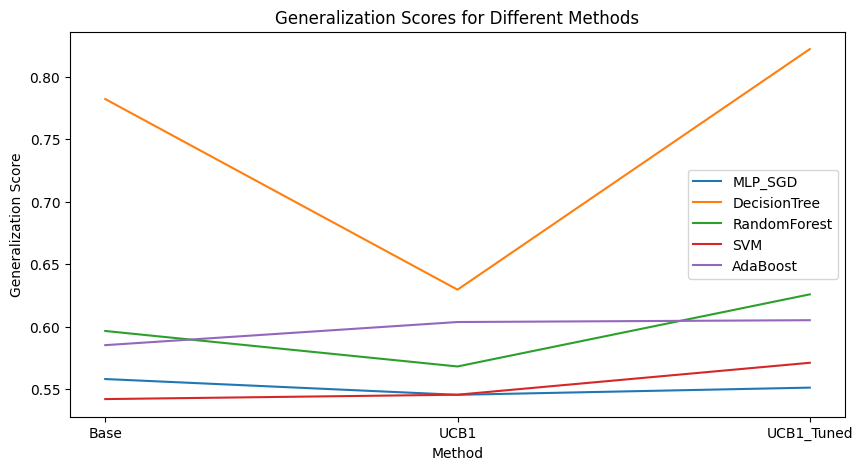

,Algorithm,Base_Score,Base_Generalization_Score,UCB1_Score,UCB1_Generalization_Score,UCB1_Tuned_Score,UCB1_Tuned_Generalization_Score,Best_Score_Method,Best_Generalization_Method
0,MLP_SGD,0.560078,0.558114,0.534346,0.545486,0.665090,0.551244,0_ucb1.csv,0_ucb1.csv
1,DecisionTree,0.562429,0.782155,0.594128,0.629615,0.627992,0.822140,0_base.csv,0_ucb1.csv
2,RandomForest,0.531958,0.596567,0.514330,0.568172,0.563012,0.625870,0_ucb1.csv,0_ucb1.csv
3,SVM,0.501527,0.542074,0.547154,0.545569,0.614885,0.571119,0_base.csv,0_base.csv
4,AdaBoost,0.507094,0.585233,0.510279,0.603735,0.512715,0.605200,0_base.csv,0_base.csv


In [13]:
import os
import pandas as pd

import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {
    "Algorithm": [],
    "Base_Score": [],
    "Base_Generalization_Score": [],
    "UCB1_Score": [],
    "UCB1_Generalization_Score": [],
    "UCB1_Tuned_Score": [],
    "UCB1_Tuned_Generalization_Score": [],
    "Best_Score_Method": [],
    "Best_Generalization_Method": []
}

base_path = "diabetes"

# Iterate through each algorithm folder
for algo in os.listdir(base_path):
    algo_path = os.path.join(base_path, algo)
    if os.path.isdir(algo_path):
        scores = {}
        generalization_scores = {}
        
        # Read the three CSV files
        for method in ["0_base.csv", "0_ucb1.csv", "0_ucb1_tuned.csv"]:
            file_path = os.path.join(algo_path, method)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                max_row = df.loc[df['score'].idxmin()]
                scores[method] = max_row['score']
                generalization_scores[method] = max_row['generalization_score']
        
        # Store the results
        results["Algorithm"].append(algo)
        results["Base_Score"].append(scores.get("0_base.csv", None))
        results["Base_Generalization_Score"].append(generalization_scores.get("0_base.csv", None))
        results["UCB1_Score"].append(scores.get("0_ucb1.csv", None))
        results["UCB1_Generalization_Score"].append(generalization_scores.get("0_ucb1.csv", None))
        results["UCB1_Tuned_Score"].append(scores.get("0_ucb1_tuned.csv", None))
        results["UCB1_Tuned_Generalization_Score"].append(generalization_scores.get("0_ucb1_tuned.csv", None))
        
        # Determine the best methods
        max_score = min(scores.values())
        best_score_methods = [method for method, score in scores.items() if score == max_score]
        max_generalization_score = min(generalization_scores.values())
        best_generalization_methods = [method for method, gen_score in generalization_scores.items() if gen_score == max_generalization_score]
        
        results["Best_Score_Method"].append(", ".join(best_score_methods))
        results["Best_Generalization_Method"].append(", ".join(best_generalization_methods))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Score"], results_df.loc[i, "UCB1_Score"], results_df.loc[i, "UCB1_Tuned_Score"]],
             label=algo)
plt.title("Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Score")
plt.legend()
plt.show()

# Plot the generalization scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Generalization_Score"], results_df.loc[i, "UCB1_Generalization_Score"], results_df.loc[i, "UCB1_Tuned_Generalization_Score"]],
             label=algo)
plt.title("Generalization Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Generalization Score")
plt.legend()
plt.show()

results_df.head(10)

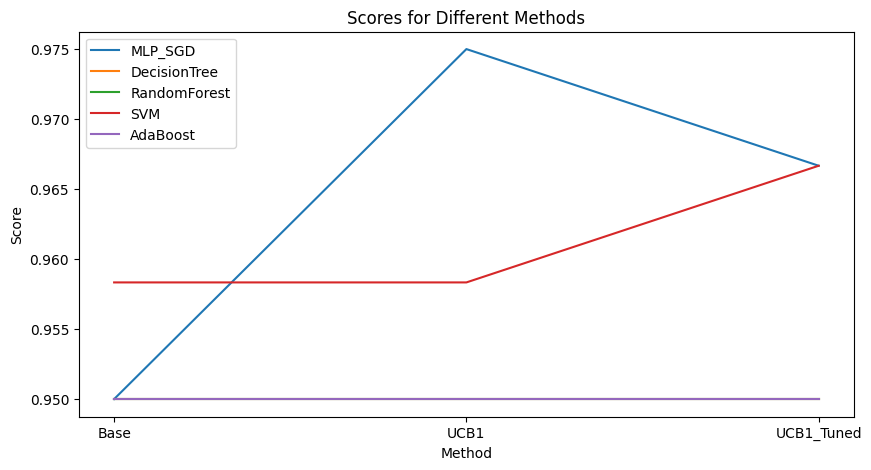

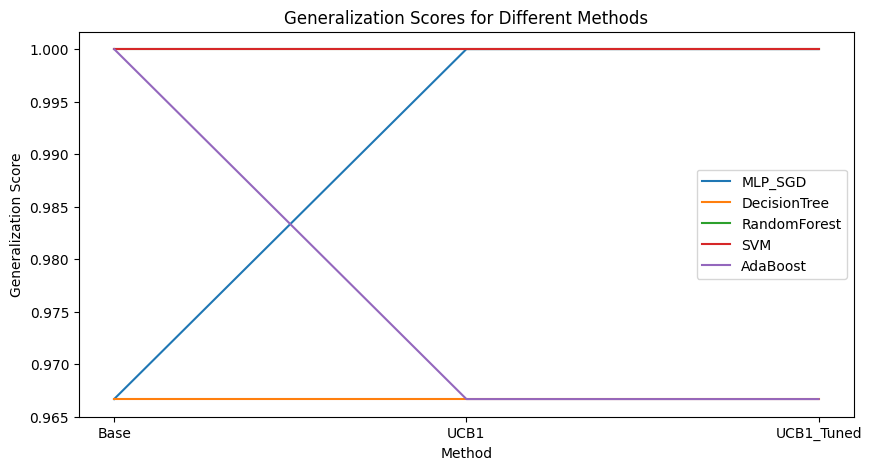

,Algorithm,Base_Score,Base_Generalization_Score,UCB1_Score,UCB1_Generalization_Score,UCB1_Tuned_Score,UCB1_Tuned_Generalization_Score,Best_Score_Method,Best_Generalization_Method
0,MLP_SGD,0.950000,0.966667,0.975000,1.000000,0.966667,1.000000,0_ucb1.csv,"0_ucb1.csv, 0_ucb1_tuned.csv"
1,DecisionTree,0.950000,0.966667,0.950000,0.966667,0.950000,0.966667,"0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv","0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv"
2,RandomForest,0.950000,1.000000,0.950000,1.000000,0.950000,1.000000,"0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv","0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv"
3,SVM,0.958333,1.000000,0.958333,1.000000,0.966667,1.000000,0_ucb1_tuned.csv,"0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv"
4,AdaBoost,0.950000,1.000000,0.950000,0.966667,0.950000,0.966667,"0_base.csv, 0_ucb1.csv, 0_ucb1_tuned.csv",0_base.csv


In [14]:
import os
import pandas as pd

import matplotlib.pyplot as plt

# Initialize a dictionary to store results
results = {
    "Algorithm": [],
    "Base_Score": [],
    "Base_Generalization_Score": [],
    "UCB1_Score": [],
    "UCB1_Generalization_Score": [],
    "UCB1_Tuned_Score": [],
    "UCB1_Tuned_Generalization_Score": [],
    "Best_Score_Method": [],
    "Best_Generalization_Method": []
}

base_path = "iris"

# Iterate through each algorithm folder
for algo in os.listdir(base_path):
    algo_path = os.path.join(base_path, algo)
    if os.path.isdir(algo_path):
        scores = {}
        generalization_scores = {}
        
        # Read the three CSV files
        for method in ["0_base.csv", "0_ucb1.csv", "0_ucb1_tuned.csv"]:
            file_path = os.path.join(algo_path, method)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                max_row = df.loc[df['score'].idxmax()]
                scores[method] = max_row['score']
                generalization_scores[method] = max_row['generalization_score']
        
        # Store the results
        results["Algorithm"].append(algo)
        results["Base_Score"].append(scores.get("0_base.csv", None))
        results["Base_Generalization_Score"].append(generalization_scores.get("0_base.csv", None))
        results["UCB1_Score"].append(scores.get("0_ucb1.csv", None))
        results["UCB1_Generalization_Score"].append(generalization_scores.get("0_ucb1.csv", None))
        results["UCB1_Tuned_Score"].append(scores.get("0_ucb1_tuned.csv", None))
        results["UCB1_Tuned_Generalization_Score"].append(generalization_scores.get("0_ucb1_tuned.csv", None))
        
        # Determine the best methods
        max_score = max(scores.values())
        best_score_methods = [method for method, score in scores.items() if score == max_score]
        max_generalization_score = max(generalization_scores.values())
        best_generalization_methods = [method for method, gen_score in generalization_scores.items() if gen_score == max_generalization_score]
        
        results["Best_Score_Method"].append(", ".join(best_score_methods))
        results["Best_Generalization_Method"].append(", ".join(best_generalization_methods))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Score"], results_df.loc[i, "UCB1_Score"], results_df.loc[i, "UCB1_Tuned_Score"]],
             label=algo)
plt.title("Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Score")
plt.legend()
plt.show()

# Plot the generalization scores
plt.figure(figsize=(10, 5))
for i, algo in enumerate(results_df["Algorithm"]):
    plt.plot(["Base", "UCB1", "UCB1_Tuned"], 
             [results_df.loc[i, "Base_Generalization_Score"], results_df.loc[i, "UCB1_Generalization_Score"], results_df.loc[i, "UCB1_Tuned_Generalization_Score"]],
             label=algo)
plt.title("Generalization Scores for Different Methods")
plt.xlabel("Method")
plt.ylabel("Generalization Score")
plt.legend()
plt.show()

results_df.head(10)